#**Challenge Telecom X**

#📌 Extracción

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
datos= pd.read_json('TelecomX_Data.json')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [7]:
#Diccionarios por normalizar
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [8]:
datos = datos.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [9]:
datos = pd.concat([datos, customer_df, phone_df, internet_df, account_df], axis=1)

In [10]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
datos.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


##**Columna de cuentas diarias**

In [12]:
#Columna de cuentas diarias
datos['Cuentas_Diarias']=datos['Charges.Monthly']/30
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##**Estandarización y transformación de datos**

In [14]:
#Reemplazar el yes y el no en las columnas
columnas_a_cambiar=['Churn','Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
datos[columnas_a_cambiar]=datos[columnas_a_cambiar].apply(lambda x: x.replace('Yes',1).replace('No',0).replace('No internet service',0).replace('No phone service',0).replace('', 0))

/tmp/ipython-input-14-1563366401.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columnas_a_cambiar]=datos[columnas_a_cambiar].apply(lambda x: x.replace('Yes',1).replace('No',0).replace('No internet service',0).replace('No phone service',0).replace('', 0))


In [15]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


In [16]:
datos[columnas_a_cambiar]=datos[columnas_a_cambiar].astype(int)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [17]:
datos['Charges.Total'] = datos['Charges.Total'].replace(' ', 0)
datos['Charges.Total'] = datos['Charges.Total'].astype(float)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [18]:
#Verificar datos duplicados
datos.duplicated().sum()

np.int64(0)

##**Traduccion de columnas y datos**

In [19]:
datos.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelacion',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_Senior',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad_Meses',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Lineas_Multiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_En_Linea',
    'OnlineBackup': 'Respaldo_En_Linea',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Peliculas_Streaming',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_Sin_Papel',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}, inplace=True)

In [20]:
datos.replace({'Unknown': 'Desconocido', 'Female': 'Femenino', 'Male': 'Masculino', 'Yes': 'Sí',
                            'No phone service': 'Sin servicio telefónico', 'Fiber optic': 'Fibra óptica',
                            'No internet service': 'Sin servicio de internet', 'One year': 'Un año',
                            'Month-to-month': 'Mensual', 'Two year': 'Dos años', 'Mailed check': 'Cheque por correo',
                            'Electronic check': 'Cheque electrónico', 'Credit card (automatic)': 'Tarjeta de crédito (automática)',
                            'Bank transfer (automatic)': 'Transferencia bancaria (automática)'}, inplace=True)

#📊 Carga y análisis

In [21]:
#Promedio de pagos mensuales (Media de los pagos mensuales)
media = datos['Cargos_Mensuales'].sum()/datos['Cargos_Mensuales'].count()
media

np.float64(64.72009770194028)

In [22]:
#Desviacion estandar respecto al promedio de pagos mensuales
desviacion_estandar=datos['Cargos_Mensuales'].std()
desviacion_estandar

30.12957188566699

In [23]:
#Cuota de pago mensual que mas predomina
moda = datos['Cargos_Mensuales'].duplicated().sum()
moda

np.int64(5682)

In [24]:
datos['Cargos_Mensuales'].describe()

,Cargos_Mensuales
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [25]:
datos.describe()

,Cancelacion,Ciudadano_Senior,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefonico,Lineas_Multiples,Respaldo_En_Linea,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Facturacion_Sin_Papel,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


##**Reporte de distribucion de evasion de clientes**

In [26]:
contador_evasion = datos['Cancelacion'].value_counts().reset_index()
contador_evasion.columns = ['Cancelacion', 'Total']

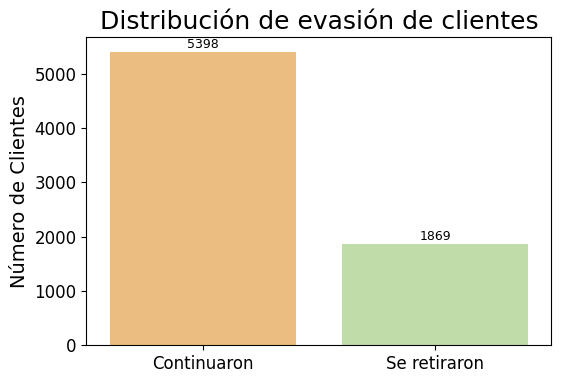

In [27]:
#Distribución de evasión de clientes
#Contador de evasion
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=contador_evasion, x='Cancelacion', y='Total', hue=contador_evasion.index, palette='Spectral', ax=ax,legend=False)

ax.set_title('Distribución de evasión de clientes', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de Clientes', fontsize=14)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)

for i, row in contador_evasion.iterrows():
    ax.text(i, row['Total'] + 20, int(row['Total']), ha='center', va='bottom', fontsize=9)

plt.show()


##**Distribucion de evasion por genero**

In [28]:
r_genero_f = datos[datos['Genero'] == 'Femenino']['Cancelacion'].value_counts().reset_index()
r_genero_f.columns = ['Cancelacion', 'Genero']
r_genero_f.head()

,Cancelacion,Genero
0,0,2653
1,1,939


In [29]:
r_genero_m = datos[datos['Genero'] == 'Masculino']['Cancelacion'].value_counts().reset_index()
r_genero_m.columns = ['Cancelacion', 'Genero']
r_genero_m.head()

,Cancelacion,Genero
0,0,2745
1,1,930


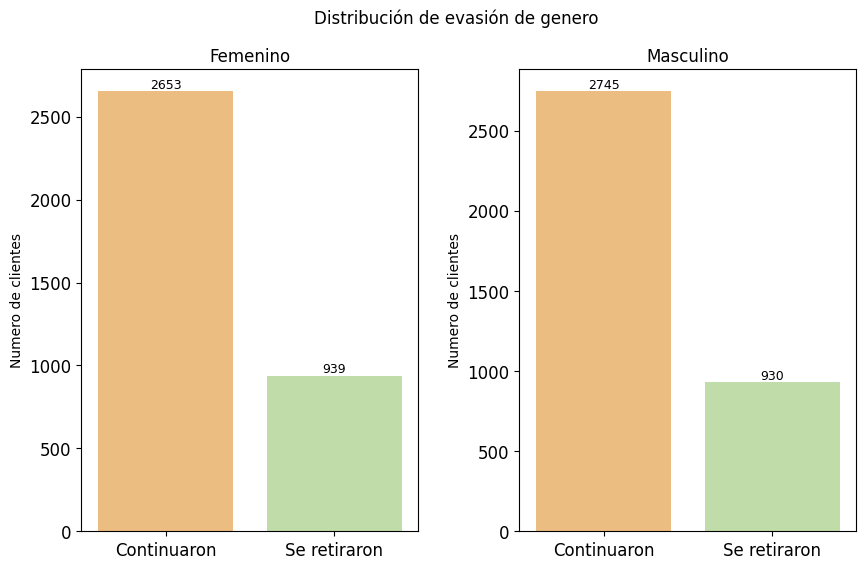

In [30]:
fig, axs =plt.subplots(1,2,figsize=(10,6))
fig.suptitle('Distribución de evasión de genero')
fig.subplots_adjust(hspace=0.5, wspace=0.3)

#Reporte de genero femenino

axs[0].set_title('Femenino')
sns.barplot(data=r_genero_f, x='Cancelacion', y='Genero', hue=r_genero_f.index, palette='Spectral', ax=axs[0],legend=False)

axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)

for i, row in r_genero_f.iterrows():
    axs[0].text(i, row['Genero'], int(row['Genero']), ha='center', va='bottom', fontsize=9)


#Reporte de genero masculino

axs[1].set_title('Masculino')
sns.barplot(data=r_genero_m, x='Cancelacion', y='Genero', hue=r_genero_m.index, palette='Spectral', ax=axs[1],legend=False)

axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[1].yaxis.set_tick_params(labelsize=12)

for i, row in r_genero_m.iterrows():
    axs[1].text(i, row['Genero'], int(row['Genero']), ha='center', va='bottom', fontsize=9)

for ax in axs.flat:
  ax.set_xlabel('')
  ax.set_ylabel('Numero de clientes')
  ax.grid(False)

plt.show()

##**Distribucion de tipos de contrato**

In [31]:
tipo_contrato_mensual = datos[datos['Contrato'] == 'Mensual']['Cancelacion'].value_counts().reset_index()
tipo_contrato_mensual.columns = ['Contrato', 'Total']
tipo_contrato_mensual.head()

,Contrato,Total
0,0,2350
1,1,1655


In [32]:
tipo_contrato_años = datos[datos['Contrato'] == 'Dos años']['Cancelacion'].value_counts().reset_index()
tipo_contrato_años.columns = ['Contrato', 'Total']
tipo_contrato_años.head()

,Contrato,Total
0,0,1695
1,1,48


In [33]:
tipo_contrato_año = datos[datos['Contrato'] == 'Un año']['Cancelacion'].value_counts().reset_index()
tipo_contrato_año.columns = ['Contrato', 'Total']
tipo_contrato_año.head()

,Contrato,Total
0,0,1353
1,1,166


In [34]:
diferentes_pagos = datos['Contrato'].value_counts().reset_index()
diferentes_pagos.columns = ['Contrato', 'Total']
diferentes_pagos.head()

,Contrato,Total
0,Mensual,4005
1,Dos años,1743
2,Un año,1519


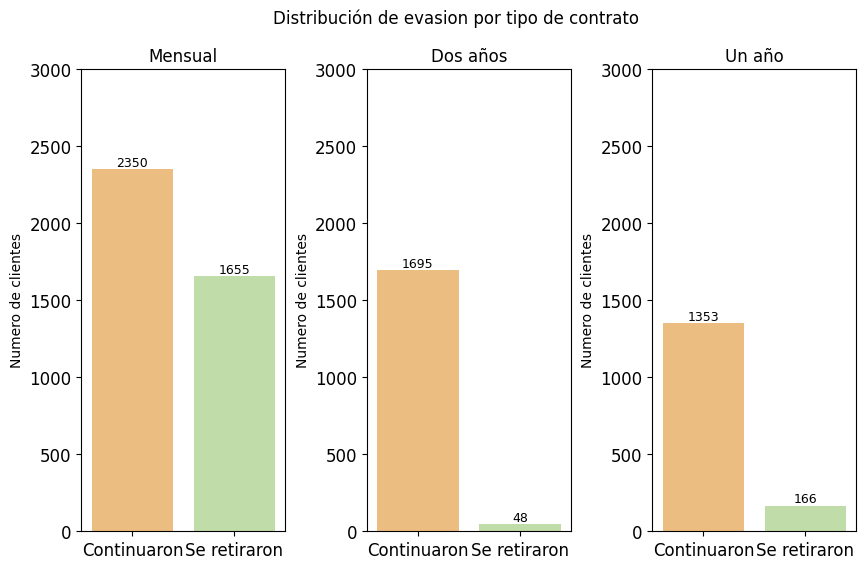

In [35]:
fig, axs =plt.subplots(1,3,figsize=(10,6))
fig.suptitle('Distribución de evasion por tipo de contrato')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Reporte mensual

axs[0].set_title('Mensual')
sns.barplot(data=tipo_contrato_mensual, x='Contrato', y='Total', hue=tipo_contrato_mensual.index, palette='Spectral', ax=axs[0],legend=False)

axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)

for i, row in tipo_contrato_mensual.iterrows():
    axs[0].text(i, row['Total'], int(row['Total']), ha='center', va='bottom', fontsize=9)


#Reporte de dos años

axs[1].set_title('Dos años')
sns.barplot(data=tipo_contrato_años, x='Contrato', y='Total', hue=tipo_contrato_años.index, palette='Spectral', ax=axs[1],legend=False)

axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[1].yaxis.set_tick_params(labelsize=12)

for i, row in tipo_contrato_años.iterrows():
    axs[1].text(i, row['Total'], int(row['Total']), ha='center', va='bottom', fontsize=9)

#Reporte de un año

axs[2].set_title('Un año')
sns.barplot(data=tipo_contrato_año, x='Contrato', y='Total', hue=tipo_contrato_año.index, palette='Spectral', ax=axs[2],legend=False)

axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[2].yaxis.set_tick_params(labelsize=12)

for i, row in tipo_contrato_año.iterrows():
    axs[2].text(i, row['Total'], int(row['Total']), ha='center', va='bottom', fontsize=9)

ymin=0
ymax=3000

for ax in axs.ravel():
  ax.set_ylim(ymin,ymax)

for ax in axs.flat:
  ax.set_xlabel('')
  ax.set_ylabel('Numero de clientes')
  ax.grid(False)

plt.show()

##**Diferentes metodos de pago**

In [36]:
metodo_pago_electronico = datos[datos['Metodo_Pago'] == 'Cheque electrónico']['Cancelacion'].value_counts().reset_index()
metodo_pago_electronico.columns = ['Metodo_Pago', 'Total']
metodo_pago_electronico.head()

,Metodo_Pago,Total
0,0,1374
1,1,1071


In [37]:
metodo_pago_correo = datos[datos['Metodo_Pago'] == 'Cheque por correo']['Cancelacion'].value_counts().reset_index()
metodo_pago_correo.columns = ['Metodo_Pago', 'Total']
metodo_pago_correo.head()

,Metodo_Pago,Total
0,0,1357
1,1,308


In [38]:
metodo_pago_bancario = datos[datos['Metodo_Pago'] == 'Transferencia bancaria (automática)']['Cancelacion'].value_counts().reset_index()
metodo_pago_bancario.columns = ['Metodo_Pago', 'Total']
metodo_pago_bancario.head()

,Metodo_Pago,Total
0,0,1331
1,1,258


In [39]:
metodo_pago_credito = datos[datos['Metodo_Pago'] == 'Tarjeta de crédito (automática)']['Cancelacion'].value_counts().reset_index()
metodo_pago_credito.columns = ['Metodo_Pago', 'Total']
metodo_pago_credito.head()

,Metodo_Pago,Total
0,0,1336
1,1,232


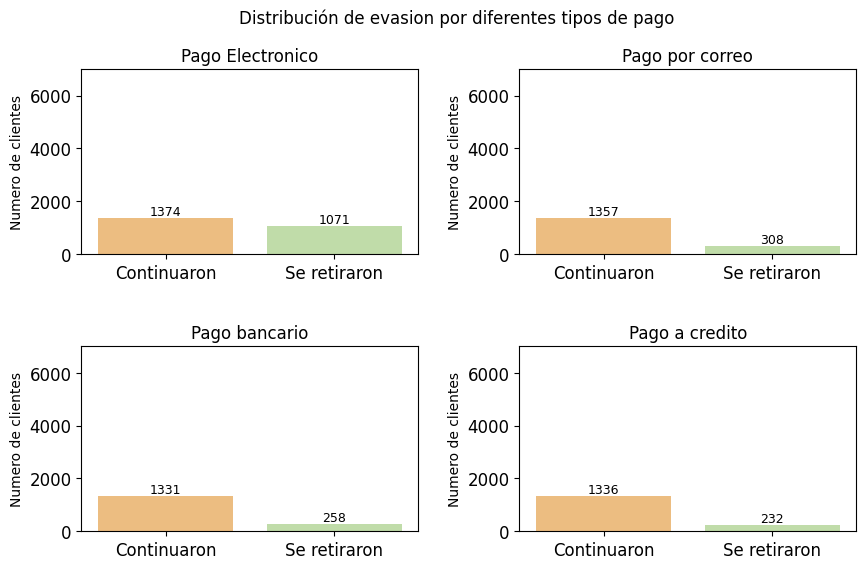

In [40]:
fig, axs =plt.subplots(2,2,figsize=(10,6))
fig.suptitle('Distribución de evasion por diferentes tipos de pago')
fig.subplots_adjust(hspace=0.5, wspace=0.3)

#Reporte pago electronico

axs[0,0].set_title('Pago Electronico')
sns.barplot(data=metodo_pago_electronico, x='Metodo_Pago', y='Total', hue=metodo_pago_electronico.index, palette='Spectral', ax=axs[0,0],legend=False)

axs[0,0].set_xticks([0, 1])
axs[0,0].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[0,0].yaxis.set_tick_params(labelsize=12)

for i, row in metodo_pago_electronico.iterrows():
    axs[0,0].text(i, row['Total'], int(row['Total']), ha='center', va='bottom', fontsize=9)


#Reporte de pago por correo

axs[0,1].set_title('Pago por correo')
sns.barplot(data=metodo_pago_correo, x='Metodo_Pago', y='Total', hue=metodo_pago_correo.index, palette='Spectral', ax=axs[0,1],legend=False)

axs[0,1].set_xticks([0, 1])
axs[0,1].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[0,1].yaxis.set_tick_params(labelsize=12)

for i, row in metodo_pago_correo.iterrows():
    axs[0,1].text(i, row['Total'], int(row['Total']), ha='center', va='bottom', fontsize=9)

#Reporte bancario

axs[1,0].set_title('Pago bancario')
sns.barplot(data=metodo_pago_bancario, x='Metodo_Pago', y='Total', hue=metodo_pago_bancario.index, palette='Spectral', ax=axs[1,0],legend=False)

axs[1,0].set_xticks([0, 1])
axs[1,0].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[1,0].yaxis.set_tick_params(labelsize=12)

for i, row in metodo_pago_bancario.iterrows():
    axs[1,0].text(i, row['Total'], int(row['Total']), ha='center', va='bottom', fontsize=9)

#Reporte por diferentes tipos de pago

axs[1,1].set_title('Pago a credito')
sns.barplot(data=metodo_pago_credito, x='Metodo_Pago', y='Total', hue=metodo_pago_credito.index, palette='Spectral', ax=axs[1,1],legend=False)

axs[1,1].set_xticks([0, 1])
axs[1,1].set_xticklabels(['Continuaron', 'Se retiraron'], fontsize=12)
axs[1,1].yaxis.set_tick_params(labelsize=12)

for i, row in metodo_pago_credito.iterrows():
    axs[1,1].text(i, row['Total'], int(row['Total']), ha='center', va='bottom', fontsize=9)

ymin=0
ymax=7000

for ax in axs.ravel():
  ax.set_ylim(ymin,ymax)

for ax in axs.flat:
  ax.set_xlabel('')
  ax.set_ylabel('Numero de clientes')
  ax.grid(False)

plt.show()


###**Conteo de evasión por variables numéricas**

In [41]:
gasto_1 = datos[datos['Cancelacion'] == 0]['Cargos_Totales']
gasto_2 = datos[datos['Cancelacion'] == 1]['Cargos_Totales']#Cancelan
tiempo_1= datos[datos['Cancelacion'] == 0]['Antiguedad_Meses']
tiempo_2= datos[datos['Cancelacion'] == 1]['Antiguedad_Meses']#Cancelan

gasto_2= gasto_2.astype(int)
gasto_1=gasto_1.astype(int)
tiempo_1=tiempo_1.astype(int)
tiempo_2=tiempo_2.astype(int)

In [48]:
gasto_2.describe()

,Cargos_Totales
count,1869.000000
mean,1531.323167
std,1890.823820
min,18.000000
25%,134.000000
50%,703.000000
75%,2331.000000
max,8684.000000


In [49]:
tiempo_2.describe()

,Antiguedad_Meses
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000


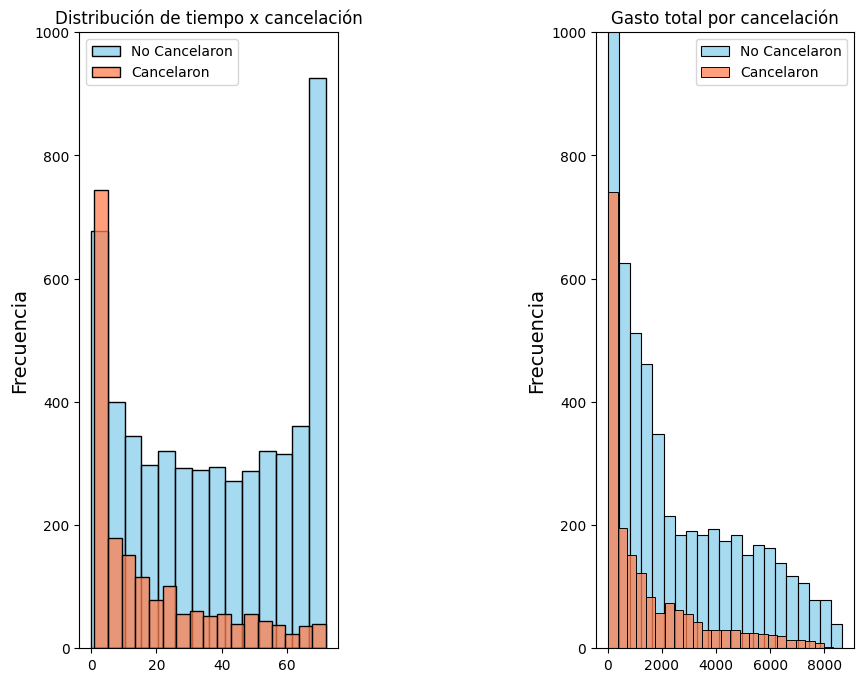

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=1, wspace=1)

# Histograma del tiempo de contrato
sns.histplot(tiempo_1, ax=axs[0], color='skyblue', label='No Cancelaron')
sns.histplot(tiempo_2, ax=axs[0], color='coral', label='Cancelaron')

axs[0].set_title('Distribución de tiempo x cancelación', loc='center', fontsize=12)
axs[0].set_xlabel('')
axs[0].set_ylabel('Frecuencia', fontsize=14)
axs[0].legend()  # Mostrar leyenda en el primer gráfico

# Histograma del gasto total
sns.histplot(gasto_1, ax=axs[1], color='skyblue', label='No Cancelaron')
sns.histplot(gasto_2, ax=axs[1], color='coral', label='Cancelaron')

axs[1].set_title('Gasto total por cancelación', loc='center', fontsize=12)
axs[1].set_xlabel('')
axs[1].set_ylabel('Frecuencia', fontsize=14)
axs[1].legend()  # Mostrar leyenda en el segundo gráfico

# Límites de altura para ambos ejes Y
ymin = 0
ymax = 1000
for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)

plt.show()


#📄Informe final - Analisis de información - Telecom X

###**🔹Introducción**

El informe presente tiene como objetivo el poder tener un control de evasion de los clientes para la empresa Telecom X, actualmente la empresa presenta una tasa de cancelacion que esta tendiendo a aumentar, por medio de diferentes analisis por reportes e informacion, se comparara el comportamiento de los clientes que continuan con el servicio con los que abandonaron el servicio.

###**🔹Limpieza y Tratamiento de Datos**

En este paso se realizaron los siguientes procesos:

1. Importar la informacion presente en el archivo json al entorno de desarrollo.
2. Normalización de la informacion aninada en diccionarios y listas, convirtiendolos en DataFrame para posteriormente eliminar y concatenar estos con los demas.
3. Creación de la columna cuentas diarias, usan el campo cargos mensuales y diviendo la informacion de este campo con los dias del mes.
4. Conversión de valores textuales tales como "Yes" y "No" a valores binarios 0 y 1, esto para poder manipular la información y realizar el procesamiento matematico de una manera adecuada.
5. Verificar los el type de las columnas y posterior a esto modificarlo segun el tipo de información que contenga, esto para manipular la información respecto el tipo de datos que almacene.
6. Verificacion sencilla de duplicado de contenido presente en el DataFrame.
7. Renombrado de columnas y filas con el objetivo de que la informacion sea accesible y fácil de entender.


###**🔹Análisis Exploratorio de Datos**

El análisis de los datos nos permitio observar el publico que tiende a desertar los servicios, con la información se detallan los factores que mas afectan directamente a los usuarios.

####**1. Distribución general de evasión**

Se generó un diagrama de barras que nos permitió identificar que 5,398 personas continuaron con el servicio, lo que representa el 74% de los clientes, mientras que 1,869 optaron por la cancelación de los servicios, representando el 25%. Basándonos en estos porcentajes, la tasa de deserción es considerablemente alta.

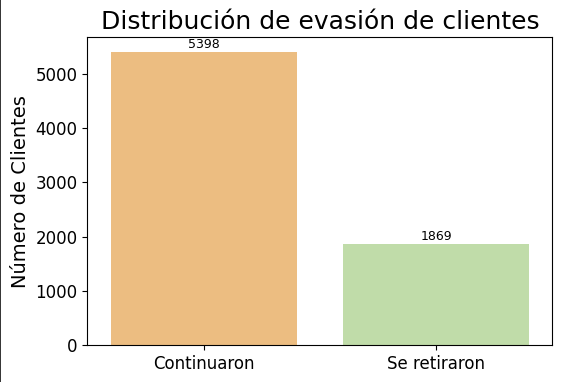

####**2. Evasión por variables catégoricas**

Se manipuló la información de acuerdo con variables categóricas. Las variables implementadas fueron:

*   Género
*   Tipo de contrato
*   Método de pago


1. Genero: Se logra identificar que hay mas usuarios continuando con el servicio. El genero Masculino representando el 50,85% (2745) y el genero Femenino representando el 49,14% (2653), los usuarios que no continuan con el servicio de acuerdo al genero indican que el genero Femenino tiene un porcentaje de 50,24% (939) y el genero Masculino tiene un porcentaje de 49,75% (930), esto nos da a entenerder que el genero Femenino tiende a no contratar el servicio y cancelar el servicio respecto al genero Masculino.

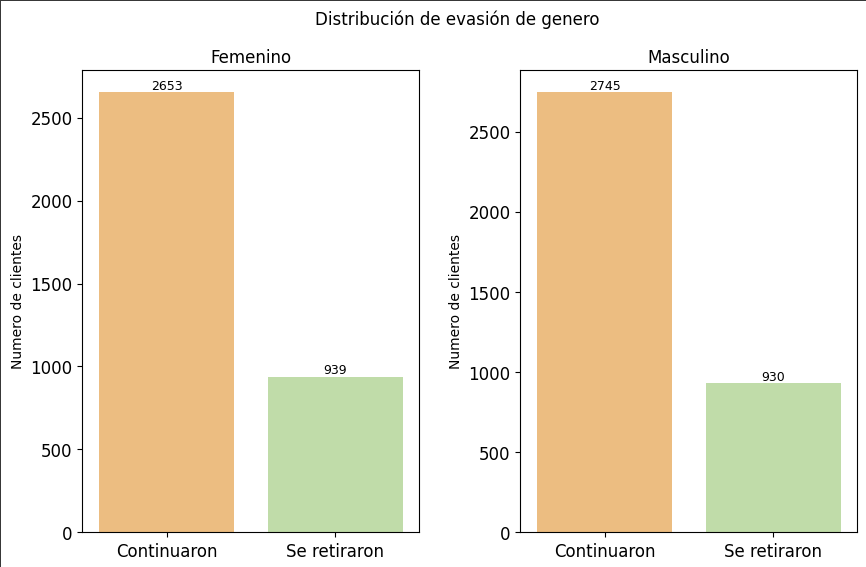

2. Tipo de contrato: El gráfico de deserción del servicio respecto al tipo de contrato nos indica que el contrato Mensual cuenta con 43,53% (2350) de personas que adquieren el servicio y 88,55% (1655) de personas que finalizaron el servicio, el contrato de Dos años tiene un porcentaje de 31,40% (1695) de personas que adquieron el servicio y 2.56% (48) de personas que finalizaron el servicio, el contrato de un año tiene un porcentaje de 25,06% (1353) de personas que continuan con el servicio y un 8,88% (166) de personas que finalizaron el servicio.

*   Con los resultados del gráfico podemos concluir que el tipo de contrato que
más suelen adquirir las personas a la hora de adquirir el servicio, es el contrato Mensual representando el 43,53% de los usuarios, Sin embargo, este tipo de contrato representa el 88,55% de deserción del mismo, a comparación de los otros contratos este posee la tasa mas alta de culminación del contrato, mientras que el contrato de Dos años posee el segundo porcentaje respecto a contratar el servicio con 31,40% de usuarios, la tasa de deserción es del
2,56%, demasiado baja en comparación con el tipo de contrato Mensual, dandonos a enternder que los contratos de mayor duración representan una estabilidad para los usuarios, siendo percibidos como opciones confiables.

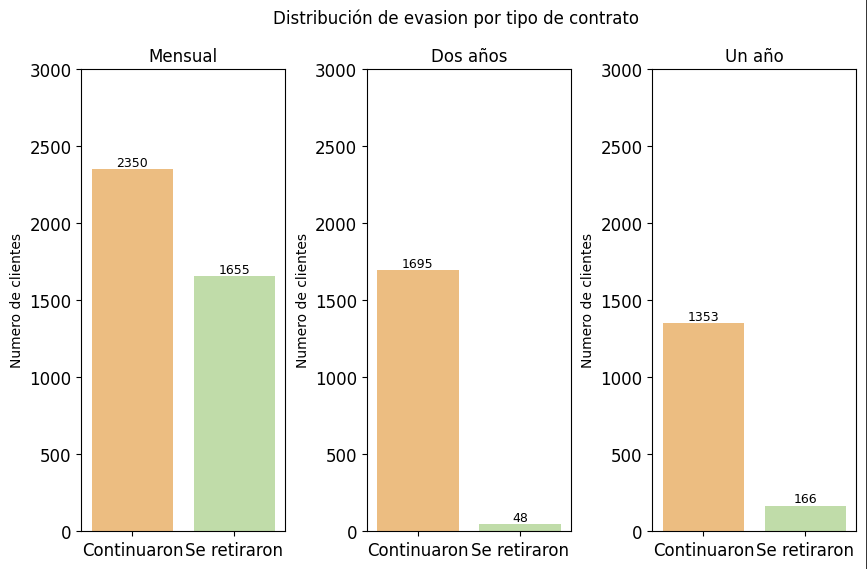

3. Metodo de pago: El pago electronico es el metodo elegido por el 25,45% (1374) de los usuarios a la hora de adquirir un servicio, los usuarios que desertan el servicio y usaron este metodo de pago es 57,30% (1071), los usuario que eligieron el pago por correo son el 25,13% (1357), con un 16,47% (308) de usuarios que no continuaron con el servicio, el metodo bancario, representa el 24,65% (1331) de usuarios que continuan con los servicios, el procetanje de cancelación es de 13,80% (258), el metodo a credito, representa el 24,74% (1336) de usuario que siguen usando los servicios, con un porcentaje de 12,41% (232), es la cantidad de usuarios que obtaron por abandonar el servicio.

*   Se logra visualizar que el pago electronico es el que mayor porcentaje de usuarios eligio para adquirir los servicios 25,45%, sin embargo los usuarios que tienden a pagar con este metodo de pago son los que mas desertan de los servicios con un 57,30%, comparando este metodo de pago con los demás es el que posee alta culminacion de servicios, por otro lado el pago a credito representa
24,74% de usuarios que usaron este metodo de pago para continuar con los servicios, la tasa de terminación de servicios por este metodo de pago es de 12,41%, siendo esta la tasa de deserción mas baja entre los metodos de pago presentes, comunicando que es el metodo elegido por los usuarios que genera mas confiabilidad y responsabilidad en su uso.

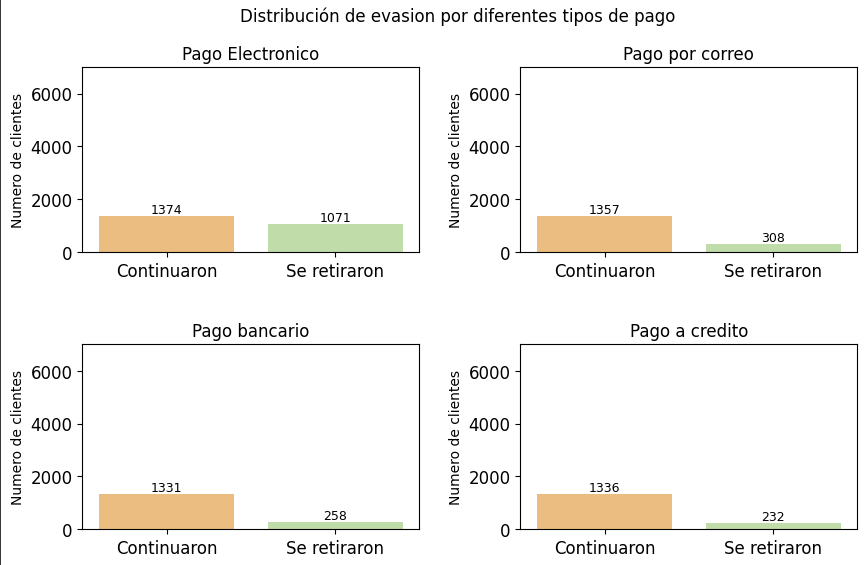


####**3. Evasión por variables numericas**

El diagrama utilizado para la visualización de los datos fue un histrograma, nos indica lo siguiente:

####**Gasto por Cancelacion**
* La mayoría de clientes que cancelaron han tenido cargos totales bajos o moderados, pero hay unos pocos que han gastado mucho más, elevando el promedio.

* Esto sugiere que muchos cancelan antes de gastar demasiado dinero, y solo unos pocos permanecen más tiempo con cargos más altos.

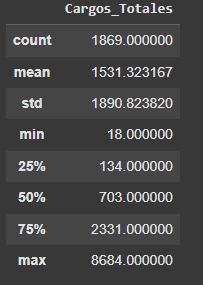

####**Distribución de tiempo x cancelación**

* La mayoría de los clientes que cancelan lo hacen relativamente pronto: la mitad dura menos de 10 meses.

* El 25% de los clientes cancela en solo 2 meses o menos, lo cual puede indicar que una parte significativa de usuarios se da cuenta muy rápido de que el servicio no cumple sus expectativas.

* El 50% de los clientes no supera el primer año.

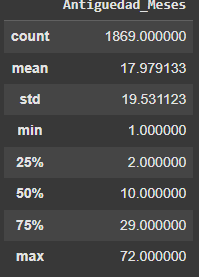

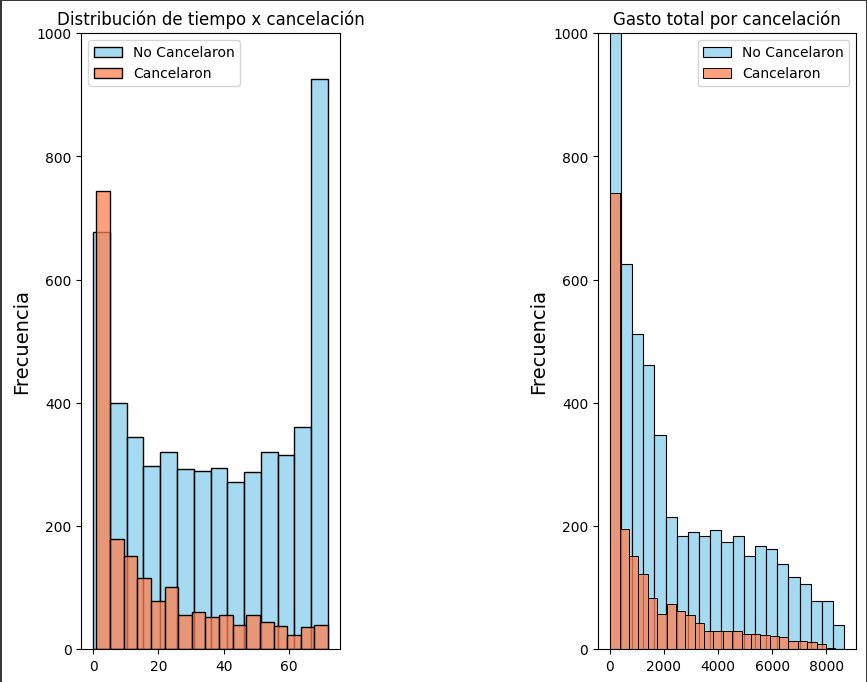

###**🔹Conslusiones**

1. Alta tasa de cancelación en los primeros meses
el 50% de los clientes que cancelaron lo hicieron antes de cumplir 10 meses con el servicio. Esto sugiere que hay problemas en la experiencia temprana del cliente o que las expectativas iniciales no se están cumpliendo.

2. La mayoría de los clientes que cancelan han gastado demasiado poco,
el 50% de los clientes que cancelaron han gastado menos de $703. Esto indica que muchos no han tenido una relación suficientemente larga o valiosa con la empresa.

3. Algunos clientes cancelan incluso después de varios años
Aunque son pocos, existen clientes que cancelan después de 2, 3 o incluso 6 años (hasta 72 meses), lo que sugiere que la cancelación no siempre se debe a una mala experiencia reciente, sino que puede responder a cambios externos o estrategias de la competencia.

4. Solo el 25% de los clientes que cancelaron tenían más de 29 meses de antigüedad, lo cual confirma que una vez se supera cierto tiempo con la compañía, la probabilidad de cancelación disminuye significativamente.

###**🔹Recomendaciones**

1. Mejorar la experiencia del cliente en los primeros 3 meses
Diseñar una estrategia de retención temprana, como onboarding guiado, seguimiento personalizado o beneficios por permanencia inicial, podría reducir la alta tasa de deserción temprana.

2. Identificar causas frecuentes de cancelación en los primeros 10 meses
Implementar encuestas de salida o entrevistas breves cuando un cliente solicita la cancelación. Esto permitirá detectar patrones comunes y actuar en consecuencia.

3. Crear planes de fidelización y beneficios progresivos
Introducir recompensas por permanencia como descuentos, mejoras de servicio o acceso exclusivo a promociones puede motivar a los clientes a mantener el contrato por más tiempo.

4. Ofrecer contratos a largo plazo con incentivos claros
Fomentar la contratación de planes de uno o dos años con tarifas preferenciales o beneficios adicionales. Los datos indican que este tipo de contrato reduce considerablemente la tasa de cancelación.